In [1]:
# PDF Processing Results - Evaluation Notebook
# Run this AFTER running pdf_pipeline.py

# %% Cell 1: Setup and Load Data
print("=" * 70)
print("EVALUATION NOTEBOOK - PDF Processing Results")
print("=" * 70)

import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Check what was processed
output_dir = Path("output")

if not output_dir.exists():
    print("\n❌ No output/ folder found!")
    print("   Run pdf_pipeline.py first:")
    print("   python pdf_pipeline.py --test-mode")
else:
    # List all processed PDFs
    pdf_folders = [d for d in output_dir.iterdir() if d.is_dir()]
    print(f"\n✅ Found {len(pdf_folders)} processed PDF(s):")
    for folder in pdf_folders:
        print(f"   📁 {folder.name}/")

EVALUATION NOTEBOOK - PDF Processing Results

✅ Found 1 processed PDF(s):
   📁 1-s2.0-S0720048X23000712-main/


In [2]:
# %% Cell 2: Load Processing Summary
print("\n" + "=" * 70)
print("LOADING PROCESSING SUMMARY")
print("=" * 70)

summary_file = output_dir / "processing_summary.json"

if summary_file.exists():
    with open(summary_file) as f:
        summary = json.load(f)
    
    print(f"\n📊 Processing Summary:")
    print(f"   • Total PDFs processed: {summary['total_pdfs']}")
    print(f"   • Chunk size: {summary['settings']['chunk_size']} tokens")
    print(f"   • Overlap: {summary['settings']['overlap']} tokens")
    print(f"   • Embeddings generated: {summary['settings']['embeddings_generated']}")
    
    print(f"\n📈 Results per PDF:")
    for result in summary['results']:
        stats = result['statistics']
        print(f"\n   {result['filename']}:")
        print(f"      Text chunks: {stats['text_chunks']}")
        print(f"      Image chunks: {stats['image_chunks']}")
        print(f"      Table chunks: {stats['table_chunks']}")
        print(f"      TOTAL: {stats['total_chunks']} chunks")
else:
    print("\n⚠️  No processing_summary.json found")


LOADING PROCESSING SUMMARY

⚠️  No processing_summary.json found


In [3]:
# %% Cell 3: Inspect First PDF in Detail
print("\n" + "=" * 70)
print("DETAILED INSPECTION - FIRST PDF")
print("=" * 70)

# Get first processed PDF
pdf_folders = [d for d in output_dir.iterdir() if d.is_dir()]

if pdf_folders:
    first_pdf = pdf_folders[0]
    print(f"\n📄 Analyzing: {first_pdf.name}")
    
    # Load metadata
    metadata_file = first_pdf / "metadata.json"
    if metadata_file.exists():
        with open(metadata_file) as f:
            metadata = json.load(f)
        
        print(f"\n📋 Document Info:")
        print(f"   • Pages: {metadata['total_pages']}")
        print(f"   • Text chunks: {metadata['statistics']['text_chunks']}")
        print(f"   • Images: {metadata['statistics']['image_chunks']}")
        print(f"   • Tables: {metadata['statistics']['table_chunks']}")
        print(f"   • Processed: {metadata['_created_at']}")


DETAILED INSPECTION - FIRST PDF

📄 Analyzing: 1-s2.0-S0720048X23000712-main


In [4]:
# %% Cell 4: Examine Text Chunks
print("\n" + "=" * 70)
print("TEXT CHUNKS ANALYSIS")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    text_chunks_file = first_pdf / "chunks" / "text_chunks.json"
    
    if text_chunks_file.exists():
        with open(text_chunks_file) as f:
            text_data = json.load(f)
        
        chunks = text_data['chunks']
        print(f"\n📝 Text Chunks Summary:")
        print(f"   • Total chunks: {len(chunks)}")
        print(f"   • Settings: {text_data['_settings']}")
        
        # Analyze chunk sizes
        char_counts = [c['metadata']['char_count'] for c in chunks]
        print(f"\n📏 Chunk Size Statistics:")
        print(f"   • Min: {min(char_counts)} characters")
        print(f"   • Max: {max(char_counts)} characters")
        print(f"   • Average: {np.mean(char_counts):.0f} characters")
        print(f"   • Median: {np.median(char_counts):.0f} characters")
        
        # Show first 3 chunks
        print(f"\n🔍 Sample Chunks (first 3):")
        for i, chunk in enumerate(chunks[:3]):
            print(f"\n   Chunk {i+1} - {chunk['chunk_id']}:")
            print(f"      Page: {chunk['metadata']['page']}")
            print(f"      Size: {chunk['metadata']['char_count']} chars (~{chunk['metadata']['token_estimate']} tokens)")
            print(f"      Has overlap: {chunk['metadata']['has_overlap']}")
            preview = chunk['content'][:150].replace('\n', ' ')
            print(f"      Preview: {preview}...")
        
        # Check overlap
        if len(chunks) >= 2:
            print(f"\n🔗 Checking Overlap Between Chunks:")
            chunk1_end = chunks[0]['content'][-100:]
            chunk2_start = chunks[1]['content'][:100]
            
            # Simple check - see if any words match
            words1 = set(chunk1_end.split())
            words2 = set(chunk2_start.split())
            overlap_words = words1.intersection(words2)
            
            print(f"   • Overlapping words found: {len(overlap_words)}")
            if overlap_words:
                print(f"   • Sample overlap: {list(overlap_words)[:5]}")
                print(f"   ✅ Overlap is working!")
    else:
        print("\n⚠️  No text_chunks.json found")


TEXT CHUNKS ANALYSIS

📝 Text Chunks Summary:
   • Total chunks: 47
   • Settings: {'chunk_size_tokens': 512, 'overlap_tokens': 75, 'chunking_strategy': 'overlap'}

📏 Chunk Size Statistics:
   • Min: 354 characters
   • Max: 2047 characters
   • Average: 1784 characters
   • Median: 2043 characters

🔍 Sample Chunks (first 3):

   Chunk 1 - page1_text_0:
      Page: 1
      Size: 2043 chars (~510 tokens)
      Has overlap: False
      Preview: European Journal of Radiology 161 (2023) 110757 Available online 25 February 20230720-048X/Published by Elsevier B.V. Prostate MRI and image Quality: ...

   Chunk 2 - page1_text_1:
      Page: 1
      Size: 2040 chars (~510 tokens)
      Has overlap: True
      Preview: of cancerous lesions. Prostate mpMRI has been shown to improve clinically significant prostate cancer (csPCa) diagnosis through targeted biopsies [1,2...

   Chunk 3 - page1_text_2:
      Page: 1
      Size: 1616 chars (~404 tokens)
      Has overlap: True
      Preview: variabili


IMAGE CHUNKS ANALYSIS

🖼️  Image Chunks Summary:
   • Total images: 9

📊 Image Details:

   Image 1 - page1_image_0:
      File: extracted_images/page_1_image_1.jpeg
      Page: 1
      Size: 236 x 298 pixels
      Format: jpeg
      Context: European Journal of Radiology 161 (2023) 110757 Contents lists available at ScienceDirect European J...


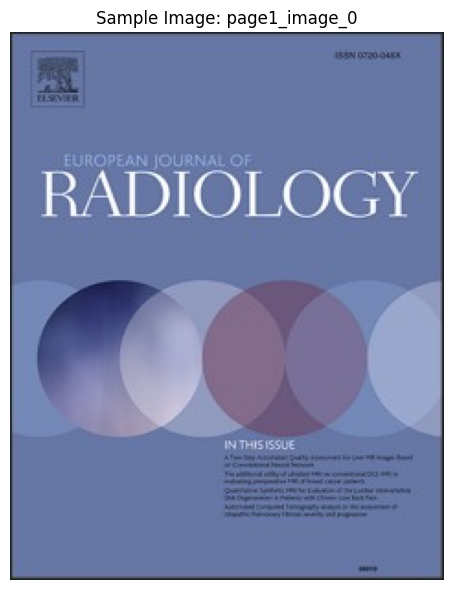


   ✅ Displayed first image above

   Image 2 - page1_image_1:
      File: extracted_images/page_1_image_2.jpeg
      Page: 1
      Size: 248 x 271 pixels
      Format: jpeg
      Context: European Journal of Radiology 161 (2023) 110757 Prostate MRI and image Quality: It is time to take s...

   Image 3 - page1_image_2:
      File: extracted_images/page_1_image_3.png
      Page: 1
      Size: 119 x 119 pixels
      Format: png
      Context: Prostate MRI and image Quality: It is time to take stock Yue Lin a, Enis C. Yilmaz a, Mason J. Belue...

   Image 4 - page2_image_0:
      File: extracted_images/page_2_image_1.png
      Page: 2
      Size: 2129 x 1142 pixels
      Format: png
      Context: No surrounding text found...

   Image 5 - page4_image_0:
      File: extracted_images/page_4_image_1.png
      Page: 4
      Size: 2126 x 1015 pixels
      Format: png
      Context: No surrounding text found...

   Image 6 - page5_image_0:
      File: extracted_images/page_5_image_1.png
     

In [5]:
# %% Cell 5: Examine Image Chunks
print("\n" + "=" * 70)
print("IMAGE CHUNKS ANALYSIS")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    image_chunks_file = first_pdf / "chunks" / "image_chunks.json"
    
    if image_chunks_file.exists():
        with open(image_chunks_file) as f:
            image_data = json.load(f)
        
        chunks = image_data['chunks']
        print(f"\n🖼️  Image Chunks Summary:")
        print(f"   • Total images: {len(chunks)}")
        
        if chunks:
            print(f"\n📊 Image Details:")
            for i, chunk in enumerate(chunks):
                print(f"\n   Image {i+1} - {chunk['chunk_id']}:")
                print(f"      File: {chunk['image_path']}")
                print(f"      Page: {chunk['metadata']['page']}")
                dims = chunk['metadata']['dimensions']
                print(f"      Size: {dims['width']} x {dims['height']} pixels")
                print(f"      Format: {chunk['metadata']['format']}")
                print(f"      Context: {chunk['context_text'][:100]}...")
                
                # Try to display the first image
                if i == 0:
                    try:
                        img_path = first_pdf / chunk['image_path']
                        if img_path.exists():
                            img = Image.open(img_path)
                            plt.figure(figsize=(8, 6))
                            plt.imshow(img)
                            plt.title(f"Sample Image: {chunk['chunk_id']}")
                            plt.axis('off')
                            plt.tight_layout()
                            plt.show()
                            print(f"\n   ✅ Displayed first image above")
                    except Exception as e:
                        print(f"\n   ⚠️  Could not display image: {e}")
        else:
            print("   ℹ️  No images found in this PDF")
    else:
        print("\n⚠️  No image_chunks.json found")

In [6]:
# %% Cell 6: Examine Table Chunks
print("\n" + "=" * 70)
print("TABLE CHUNKS ANALYSIS")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    table_chunks_file = first_pdf / "chunks" / "table_chunks.json"
    
    if table_chunks_file.exists():
        with open(table_chunks_file) as f:
            table_data = json.load(f)
        
        chunks = table_data['chunks']
        print(f"\n📊 Table Chunks Summary:")
        print(f"   • Total tables: {len(chunks)}")
        
        if chunks:
            print(f"\n📋 Table Details:")
            for i, chunk in enumerate(chunks):
                print(f"\n   Table {i+1} - {chunk['chunk_id']}:")
                print(f"      Page: {chunk['metadata']['page']}")
                print(f"      Rows: {chunk['metadata']['num_rows']}")
                print(f"      Columns: {chunk['metadata']['num_cols']}")
                print(f"      Detection: {chunk['metadata']['detection_method']}")
                
                # Show first few rows
                table_content = chunk['content']
                print(f"\n      Preview (first 3 rows):")
                for row_idx, row in enumerate(table_content[:3]):
                    print(f"         Row {row_idx + 1}: {row}")
        else:
            print("   ℹ️  No tables detected in this PDF")
    else:
        print("\n⚠️  No table_chunks.json found")


TABLE CHUNKS ANALYSIS

📊 Table Chunks Summary:
   • Total tables: 5

📋 Table Details:

   Table 1 - page1_table_0:
      Page: 1
      Rows: 3
      Columns: 2
      Detection: text_alignment

      Preview (first 3 rows):
         Row 1: ['A R T I C L E  I N F O', 'A B S T R A C T']
         Row 2: ['Keywords: \nProstatic Neoplasms \nMagnetic Resonance Imaging \nDiagnostic Imaging', 'Multiparametric magnetic resonance imaging (mpMRI) plays a vital role in prostate cancer diagnosis and \nmanagement. With the increase in use of mpMRI, obtaining the best possible quality images has become a \npriority. The Prostate Imaging Reporting and Data System (PI-RADS) was introduced to standardize and optimize \npatient preparation, scanning techniques, and interpretation. However, the quality of the MRI sequences depends \nnot only on the hardware/software and scanning parameters, but also on patient-related factors. Common \npatient-related factors include bowel peristalsis, rectal distension, 

In [7]:
# %% Cell 7: Check Embeddings (if generated)
print("\n" + "=" * 70)
print("EMBEDDINGS ANALYSIS")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    embeddings_file = first_pdf / "embeddings" / "text_embeddings.npy"
    metadata_file = first_pdf / "embeddings" / "embedding_metadata.json"
    
    if embeddings_file.exists() and metadata_file.exists():
        # Load embeddings
        embeddings = np.load(embeddings_file)
        
        with open(metadata_file) as f:
            embed_metadata = json.load(f)
        
        print(f"\n🧮 Embeddings Summary:")
        print(f"   • Model: {embed_metadata['_model']}")
        print(f"   • Dimensions: {embed_metadata['_dimensions']}")
        print(f"   • Total embeddings: {len(embeddings)}")
        print(f"   • Shape: {embeddings.shape}")
        print(f"   • Created: {embed_metadata['_created_at']}")
        
        # Show sample
        print(f"\n🔍 First embedding (first 10 dimensions):")
        print(f"   {embeddings[0][:10]}")
        
        # Calculate similarity between first two chunks (if available)
        if len(embeddings) >= 2:
            from numpy.linalg import norm
            
            vec1 = embeddings[0]
            vec2 = embeddings[1]
            
            # Cosine similarity
            similarity = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
            
            print(f"\n📏 Similarity between first two chunks:")
            print(f"   • Cosine similarity: {similarity:.4f}")
            
            # Show what those chunks are
            print(f"\n   Chunk 1: {embed_metadata['mappings'][0]['preview']}")
            print(f"   Chunk 2: {embed_metadata['mappings'][1]['preview']}")
    else:
        print("\n ℹ️  No embeddings generated")
        print("   To generate embeddings, run:")
        print("   python pdf_pipeline.py --test-mode --embed")


EMBEDDINGS ANALYSIS

 ℹ️  No embeddings generated
   To generate embeddings, run:
   python pdf_pipeline.py --test-mode --embed



VISUALIZATION - CHUNK SIZE DISTRIBUTION


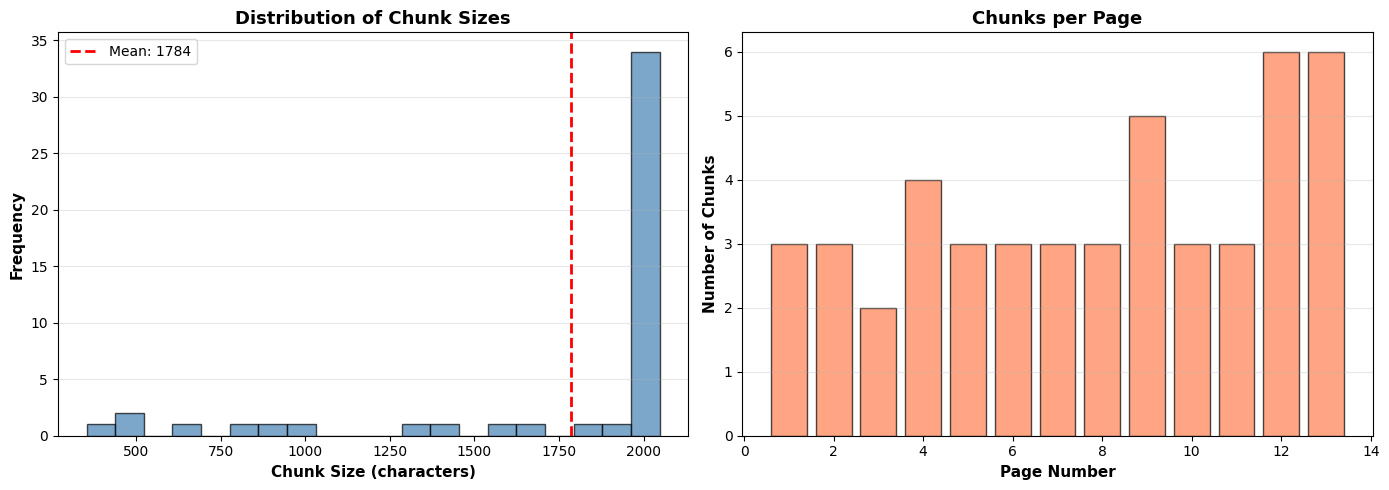


✅ Saved visualization: output/chunk_analysis.png


In [8]:
# %% Cell 8: Visualize Chunk Distribution
print("\n" + "=" * 70)
print("VISUALIZATION - CHUNK SIZE DISTRIBUTION")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    text_chunks_file = first_pdf / "chunks" / "text_chunks.json"
    
    if text_chunks_file.exists():
        with open(text_chunks_file) as f:
            text_data = json.load(f)
        
        chunks = text_data['chunks']
        char_counts = [c['metadata']['char_count'] for c in chunks]
        pages = [c['metadata']['page'] for c in chunks]
        
        # Create visualizations
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Histogram of chunk sizes
        axes[0].hist(char_counts, bins=20, color='steelblue', alpha=0.7, edgecolor='black')
        axes[0].axvline(np.mean(char_counts), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(char_counts):.0f}')
        axes[0].set_xlabel('Chunk Size (characters)', fontsize=11, fontweight='bold')
        axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
        axes[0].set_title('Distribution of Chunk Sizes', fontsize=13, fontweight='bold')
        axes[0].legend()
        axes[0].grid(axis='y', alpha=0.3)
        
        # Chunks per page
        from collections import Counter
        page_counts = Counter(pages)
        pages_sorted = sorted(page_counts.keys())
        counts = [page_counts[p] for p in pages_sorted]
        
        axes[1].bar(pages_sorted, counts, color='coral', alpha=0.7, edgecolor='black')
        axes[1].set_xlabel('Page Number', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Number of Chunks', fontsize=11, fontweight='bold')
        axes[1].set_title('Chunks per Page', fontsize=13, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(output_dir / 'chunk_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✅ Saved visualization: output/chunk_analysis.png")

In [9]:
# %% Cell 9: Quality Assessment
print("\n" + "=" * 70)
print("QUALITY ASSESSMENT")
print("=" * 70)

if pdf_folders:
    first_pdf = pdf_folders[0]
    text_chunks_file = first_pdf / "chunks" / "text_chunks.json"
    
    if text_chunks_file.exists():
        with open(text_chunks_file) as f:
            text_data = json.load(f)
        
        chunks = text_data['chunks']
        char_counts = [c['metadata']['char_count'] for c in chunks]
        
        print(f"\n✅ Quality Metrics:")
        
        # Check chunk sizes
        too_small = sum(1 for c in char_counts if c < 100)
        good_size = sum(1 for c in char_counts if 100 <= c <= 2000)
        too_large = sum(1 for c in char_counts if c > 2000)
        
        print(f"\n   Chunk Size Distribution:")
        print(f"      • Too small (<100 chars): {too_small} ({too_small/len(chunks)*100:.1f}%)")
        print(f"      • Good size (100-2000): {good_size} ({good_size/len(chunks)*100:.1f}%)")
        print(f"      • Too large (>2000 chars): {too_large} ({too_large/len(chunks)*100:.1f}%)")
        
        # Consistency score
        cv = np.std(char_counts) / np.mean(char_counts)
        print(f"\n   Consistency:")
        print(f"      • Coefficient of variation: {cv:.3f}")
        if cv < 0.3:
            print(f"      ✅ Very consistent chunk sizes")
        elif cv < 0.5:
            print(f"      ✅ Reasonably consistent")
        else:
            print(f"      ⚠️  High variation in chunk sizes")
        
        # Overall assessment
        print(f"\n   Overall Quality:")
        if good_size / len(chunks) > 0.8 and cv < 0.5:
            print(f"      ✅ EXCELLENT - Ready for embedding!")
        elif good_size / len(chunks) > 0.6:
            print(f"      ✅ GOOD - Minor adjustments may help")
        else:
            print(f"      ⚠️  Consider adjusting chunk_size parameter")


QUALITY ASSESSMENT

✅ Quality Metrics:

   Chunk Size Distribution:
      • Too small (<100 chars): 0 (0.0%)
      • Good size (100-2000): 13 (27.7%)
      • Too large (>2000 chars): 34 (72.3%)

   Consistency:
      • Coefficient of variation: 0.282
      ✅ Very consistent chunk sizes

   Overall Quality:
      ⚠️  Consider adjusting chunk_size parameter


In [10]:
# %% Cell 10: File Structure Summary
print("\n" + "=" * 70)
print("OUTPUT FOLDER STRUCTURE")
print("=" * 70)

def print_tree(directory, prefix="", max_depth=3, current_depth=0):
    """Print directory tree structure"""
    if current_depth >= max_depth:
        return
    
    try:
        contents = sorted(directory.iterdir(), key=lambda x: (x.is_file(), x.name))
        
        for i, path in enumerate(contents):
            is_last = i == len(contents) - 1
            current_prefix = "└── " if is_last else "├── "
            print(f"{prefix}{current_prefix}{path.name}")
            
            if path.is_dir() and current_depth < max_depth - 1:
                extension_prefix = "    " if is_last else "│   "
                print_tree(path, prefix + extension_prefix, max_depth, current_depth + 1)
    except PermissionError:
        pass

print(f"\n📂 output/")
if output_dir.exists():
    print_tree(output_dir, max_depth=4)
else:
    print("   (empty)")


OUTPUT FOLDER STRUCTURE

📂 output/
├── 1-s2.0-S0720048X23000712-main
│   ├── chunks
│   │   ├── image_chunks.json
│   │   ├── table_chunks.json
│   │   └── text_chunks.json
│   ├── embeddings
│   ├── extracted_images
│   │   ├── page_1_image_1.jpeg
│   │   ├── page_1_image_2.jpeg
│   │   ├── page_1_image_3.png
│   │   ├── page_2_image_1.png
│   │   ├── page_4_image_1.png
│   │   ├── page_5_image_1.png
│   │   ├── page_6_image_1.png
│   │   ├── page_8_image_1.png
│   │   └── page_9_image_1.png
│   └── .DS_Store
├── .DS_Store
└── chunk_analysis.png


In [11]:
# %% Cell 11: Next Steps & Recommendations
print("\n" + "=" * 70)
print("NEXT STEPS & RECOMMENDATIONS")
print("=" * 70)

print("""
✅ What you've accomplished:
   • Extracted text with overlap (prevents information loss)
   • Extracted images with context (ready for multimodal embeddings)
   • Detected table structures (basic detection)
   • Organized everything in a clear folder structure

🎯 Next steps for building a RAG system:

1. GENERATE EMBEDDINGS (if not done yet):
   python pdf_pipeline.py --test-mode --embed
   
2. STORE IN VECTOR DATABASE:
   • Use Pinecone, Weaviate, Chroma, or FAISS
   • Load embeddings from .npy files
   • Include metadata for filtering
   
3. BUILD RETRIEVAL:
   • Query: User asks a question
   • Embed: Convert question to embedding
   • Search: Find top-k similar chunks
   • Return: Retrieve chunk content + metadata
   
4. IMPLEMENT RAG:
   • Retrieve: Get relevant chunks
   • Augment: Add chunks to LLM context
   • Generate: LLM answers using retrieved context

📚 Recommended improvements:

   • For better table extraction: Use pdfplumber
     pip install pdfplumber
   
   • For multimodal: Add CLIP embeddings for images
     pip install transformers torch
   
   • For production: Add error handling and logging
   
   • For scale: Process PDFs in parallel (multiprocessing)

🔧 Adjusting parameters:

   • Chunks too small? Increase --chunk-size
   • Need more overlap? Increase --overlap
   • Too many chunks? Increase chunk size
   • Processing slow? Skip --embed, do it separately

📖 Understanding your outputs:

   • text_chunks.json: For semantic search
   • image_chunks.json: For visual search (needs image embeddings)
   • table_chunks.json: For structured data queries
   • embeddings/*.npy: Ready for vector database
   • metadata.json: Document-level statistics
""")

print("=" * 70)
print("🎉 EVALUATION COMPLETE!")
print("=" * 70)
print("\nYour outputs are well-organized and ready for the next step!")
print("Check the output/ folder to explore all extracted content.")
print("=" * 70)


NEXT STEPS & RECOMMENDATIONS

✅ What you've accomplished:
   • Extracted text with overlap (prevents information loss)
   • Extracted images with context (ready for multimodal embeddings)
   • Detected table structures (basic detection)
   • Organized everything in a clear folder structure

🎯 Next steps for building a RAG system:

1. GENERATE EMBEDDINGS (if not done yet):
   python pdf_pipeline.py --test-mode --embed
   
2. STORE IN VECTOR DATABASE:
   • Use Pinecone, Weaviate, Chroma, or FAISS
   • Load embeddings from .npy files
   • Include metadata for filtering
   
3. BUILD RETRIEVAL:
   • Query: User asks a question
   • Embed: Convert question to embedding
   • Search: Find top-k similar chunks
   • Return: Retrieve chunk content + metadata
   
4. IMPLEMENT RAG:
   • Retrieve: Get relevant chunks
   • Augment: Add chunks to LLM context
   • Generate: LLM answers using retrieved context

📚 Recommended improvements:

   • For better table extraction: Use pdfplumber
     pip insta